In [1]:
%matplotlib widget

In [2]:
from typing import List, Tuple,Dict  # @UnusedImpor
from causets.sprinkledcauset import SprinkledCauset
from causets.causet import Causet
from causets.spacetimes import deSitterSpacetime, FlatSpacetime 
from causets.shapes import CoordinateShape  
from causets.causetevent import CausetEvent  #  @UnusedImport
import causets.causetplotting as cplt  


In [3]:

# Create a sprinkle from de Sitter spacetime with cosmological horizon at
# radius 1.0. Coordinates range over a cylinder with height 3.0
S: CoordinateShape = CoordinateShape(3, 'diamond',radius=1)
C: SprinkledCauset = SprinkledCauset(intensity=300.0,
  spacetime=FlatSpacetime(3), shape=S)
start: CausetEvent = C.create([[-1,0,0]]).pop()
end: CausetEvent = C.create([[1,0,0]]).pop()


In [13]:
C.intensify(300)

{CausetEvent(past={#487, #227, #468, #565, #561, #109}, label=514, coordinates=[-0.39371586, 0.22220655, -0.1760312]),
 CausetEvent(past={#579, #215, #344, #542, #621, #58, #130, #14, #503, #252, #440, #439}, label=475, coordinates=[0.3084117, 0.10601226, -0.6748563]),
 CausetEvent(past={#321}, label=389, coordinates=[-0.48066604, 0.28380385, 0.40051207]),
 CausetEvent(past={#363, #495, #'0.10', #'0.35'}, label=468, coordinates=[-0.5416049, 0.24195358, -0.058076035]),
 CausetEvent(past={#578, #'0.35'}, label=513, coordinates=[-0.5683984, 0.10133065, 0.2216192]),
 CausetEvent(past={#245, #413, #62, #620, #87, #338, #232, #519, #379, #450, #249, #'0.01', #411, #504, #139, #354, #'0.01', #463, #471, #494, #132, #600, #316, #117}, label=601, coordinates=[0.4642904, -0.18066846, 0.4611528]),
 CausetEvent(past={#644, #191, #450, #476, #60, #413, #315, #352, #136, #460, #154, #523, #268, #554}, label=480, coordinates=[0.4037667, 0.03289057, 0.38989925]),
 CausetEvent(past={#'0.08', #263, #342

In [14]:
# compute paths to end
paths_to_end: Dict[CausetEvent,int] = dict()
for event in C.sortedByCausality(reverse=True):
  if event == end:
    paths_to_end[event] = 1
    continue
  else:
    paths_to_end[event] = sum(paths_to_end[future_event] for future_event in list(event.LinkFuture))
  

In [15]:
directFuture = list(start.LinkFuture)
for event in directFuture:
  event.Label = f"{paths_to_end[event]/paths_to_end[start]:.2f}"

In [16]:
print(sorted(list(map(lambda event: paths_to_end[event]/paths_to_end[start],directFuture)),reverse=True))

[0.1880369320718452, 0.1342567093826939, 0.11925133808962401, 0.11226754330030735, 0.10463969455191052, 0.06692991293251811, 0.062189122607120034, 0.051502412023380115, 0.051064689228882056, 0.02177234664897955, 0.01579124892263203, 0.013809058931262113, 0.012106246720095578, 0.009646422822769975, 0.009435636464350746, 0.005137302576902679, 0.003868964581394628, 0.003590700599650527, 0.0033178199771262923, 0.0033033405971556185, 0.002579650048236755, 0.0013890923118019384, 0.001104795255070057, 0.0008721041936182689, 0.0006534284294457869, 0.0003629126646495777, 0.00031919607512273594, 0.00026257798677587087, 0.00019036671999904956, 0.00010553240401702553, 8.093602137453497e-05, 3.7869147615608105e-05, 2.56173645634996e-05, 2.3946666874575714e-05, 2.283286841529312e-05, 2.2183152647378276e-05, 1.4479379970673686e-05, 6.682790755695547e-06, 5.383359219865858e-06, 1.392248074103239e-06, 6.497157679148449e-07, 5.568992296412956e-07, 3.712661530941971e-07]


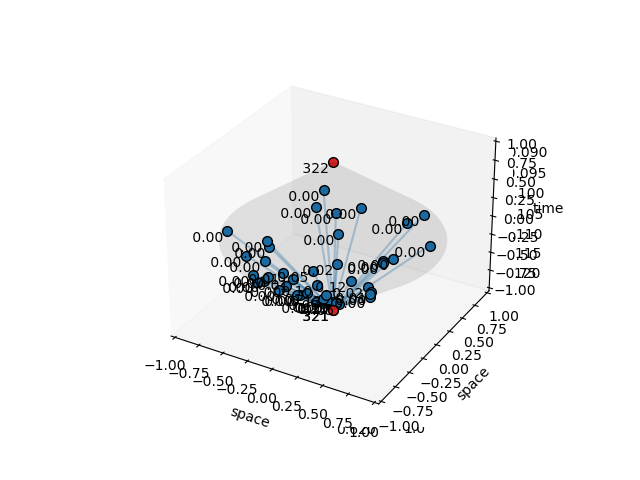

In [19]:
dims = [1,2,0]
S.plot(dims)  # plot the embedding shape
# Add causet plots and show result:
# cplt.plot(C, dims=dims, events={'alpha': 0.05},
#          links={'alpha': 0.1, 'linewidth': 0.5}, labels=False)
# cplt.plot(list(start.Cone), dims=dims,      spacetime=C.Spacetime, 
#           events={'alpha': 0.1}, links={'alpha': 0.3, 'linewidth': 1.5},
#           labels=False)
cplt.plot(directFuture+[start],spacetime=C.Spacetime,dims=dims,labels=True,links={'alpha': 0.3, 'linewidth': 1.5})
# end times for past and future light-cone:
timeslices: Tuple[float, float] = S.Limits(0)
cplt.plot(start, dims=dims, spacetime=C.Spacetime,
          events={'markerfacecolor': 'cs:red'},
          time=timeslices)
cplt.plot(end, dims=dims, spacetime=C.Spacetime,
          events={'markerfacecolor': 'cs:red'},
          time=timeslices)
ax: cplt.Axes = cplt._getAxis()
ax.set_xlabel('space' if dims[0] > 0 else 'time')
ax.set_ylabel('space' if dims[1] > 0 else 'time')
ax.set(xlim=[-1,1],ylim=[-1,1])
if len(dims) > 2:
    ax.set_zlabel('space' if dims[2] > 0 else 'time')
    ax.set_zlim([-1,1])
    ax.grid(False)
cplt.show()

In [18]:
ax.clear()